# Vitamin D Analysis

In [1]:
import MySQLdb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
conn = MySQLdb.connect(host = 'localhost', user = 'root', passwd = 'mysql')

In [3]:
cursor = conn.cursor()

In [4]:
cursor.execute('use health_camp')

0

In [5]:
cursor.execute('select age, eating_habits, gender, Q29, Q30, Q31, Q32, Q33, Q34, Q35, Q36, Q37, Q38, R_D, R_BMD from profile, questions, reports where profile.P_Id = questions.P_Id and questions.R_Id = reports.R_Id and R_D != "NULL"')
D = pd.DataFrame(list(cursor.fetchall()), columns = ['Age', 'Eating Habits', 'Gender', 'Q29', 'Q30', 'Q31', 'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'R_D', 'R_BMD'])
D.head()

,Age,Eating Habits,Gender,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,R_D,R_BMD
0,38,Vegetarian,Male,1,0,0,0,Office,0,0.0,0.0,1,0.0,Deficient,Osteopenia
1,51,Non - Vegetarian,Female,0,0,1,0,Office,1,0.0,0.0,0,0.0,Deficient,None
2,15,Vegetarian,Female,1,0,1,0,None,0,0.0,1.0,0,0.0,Insufficient,Normal
3,16,Eggetarian,Female,1,0,1,0,None,0,0.0,1.0,0,0.0,Sufficient,Normal
4,55,Vegetarian,Female,0,1,1,0,Household,1,0.0,1.0,0,0.0,Insufficient,None


In [6]:
D.describe()

,Age,Q29,Q30,Q31,Q32,Q34,Q35,Q36,Q37,Q38
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,52.000000,45.000000,53.000000,52.000000
mean,50.962264,0.207547,0.509434,0.547170,0.037736,0.641509,0.442308,0.133333,0.226415,0.192308
std,17.275997,0.409432,0.504695,0.502533,0.192380,0.484146,0.501506,0.343776,0.422516,0.397959
min,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,53.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,60.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,82.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### D vs Eating Habits

In [7]:
D['Count'] = np.repeat(1, 53)
pivot = pd.pivot_table(D, values='Count', index=['R_D'], columns=['Eating Habits'], aggfunc=np.sum)
pivot.fillna(0, inplace = True)
pivot

Eating Habits,Eggetarian,Non - Vegetarian,Vegetarian
R_D,,,
Deficient,0.0,2.0,5.0
Insufficient,2.0,11.0,26.0
Sufficient,1.0,1.0,5.0


In [8]:
stat = stats.chi2_contingency(pivot)
stat

(1.8196697482411768,
 0.7688817525315153,
 4,
 array([[ 0.39622642,  1.8490566 ,  4.75471698],
        [ 2.20754717, 10.30188679, 26.49056604],
        [ 0.39622642,  1.8490566 ,  4.75471698]]))

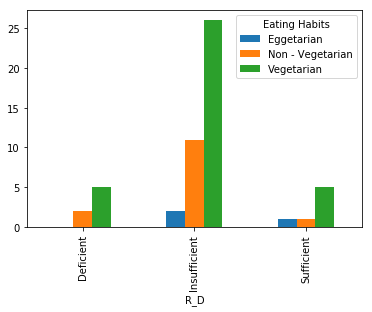

In [9]:
pivot.plot(kind='bar')

In [10]:
Total_D = [pivot.iloc[0, :] + pivot.iloc[1, :] + pivot.iloc[2, :]]
Total_D = pd.DataFrame(Total_D, index = ['Total D'])
piv = pivot.append(Total_D)
Total_EH = pivot['Eggetarian'] + pivot['Non - Vegetarian'] + pivot['Vegetarian']
piv['Total Eating Habits'] = Total_EH
Percentage_Def = [(piv.iloc[0, :]/piv.iloc[3, :])*100]
Percentage_Insuff = [(piv.iloc[1, :]/piv.iloc[3, :])*100]
Percentage_Suff = [(piv.iloc[2, :]/piv.iloc[3, :])*100]
Percentage_Def = pd.DataFrame(Percentage_Def, index = ['Percentage Def'])
Percentage_Insuff = pd.DataFrame(Percentage_Insuff, index = ['Percentage Insuff'])
Percentage_Suff = pd.DataFrame(Percentage_Suff, index = ['Percentage Suff'])
Percentage_RE = (piv['Eggetarian']/piv['Total Eating Habits'])*100
Percentage_RNV = (piv['Non - Vegetarian']/piv['Total Eating Habits'])*100
Percentage_RV = (piv['Vegetarian']/piv['Total Eating Habits'])*100
piv = piv.append(Percentage_Def)
piv = piv.append(Percentage_Insuff)
piv = piv.append(Percentage_Suff)
piv['Percentage Eggetarian'] = Percentage_RE
piv['Percentage Non - Vegetarian'] = Percentage_RNV
piv['Pecentage Vegetarian'] = Percentage_RV
piv

Eating Habits,Eggetarian,Non - Vegetarian,Vegetarian,Total Eating Habits,Percentage Eggetarian,Percentage Non - Vegetarian,Pecentage Vegetarian
Deficient,0.000000,2.000000,5.000000,7.0,0.000000,28.571429,71.428571
Insufficient,2.000000,11.000000,26.000000,39.0,5.128205,28.205128,66.666667
Sufficient,1.000000,1.000000,5.000000,7.0,14.285714,14.285714,71.428571
Total D,3.000000,14.000000,36.000000,NaN,NaN,NaN,NaN
Percentage Def,0.000000,14.285714,13.888889,NaN,NaN,NaN,NaN
Percentage Insuff,66.666667,78.571429,72.222222,NaN,NaN,NaN,NaN
Percentage Suff,33.333333,7.142857,13.888889,NaN,NaN,NaN,NaN


### D vs Gender

In [11]:
pivot1 = pd.pivot_table(D, values='Count', index=['R_D'], columns=['Gender'], aggfunc=np.sum)
pivot1

Gender,Female,Male
R_D,,
Deficient,4,3
Insufficient,23,16
Sufficient,4,3


In [12]:
stat1 = stats.chi2_contingency(pivot1)
stat1

(0.014233078749207843,
 0.9929087232287712,
 2,
 array([[ 4.09433962,  2.90566038],
        [22.81132075, 16.18867925],
        [ 4.09433962,  2.90566038]]))

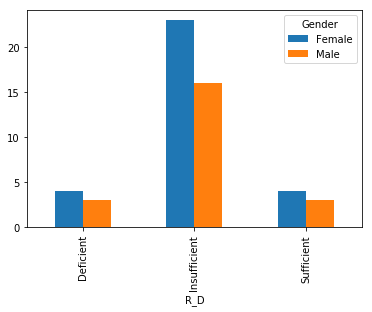

In [13]:
pivot1.plot(kind='bar')

In [14]:
Total_D = [pivot1.iloc[0, :] + pivot1.iloc[1, :] + pivot1.iloc[2, :]]
Total_D = pd.DataFrame(Total_D, index = ['Total D'])
piv = pivot1.append(Total_D)
Total_Gender = pivot1['Female'] + pivot1['Male']
piv['Total Gender'] = Total_Gender
Percentage_Def = [(piv.iloc[0, :]/piv.iloc[3, :])*100]
Percentage_Insuff = [(piv.iloc[1, :]/piv.iloc[3, :])*100]
Percentage_Suff = [(piv.iloc[2, :]/piv.iloc[3, :])*100]
Percentage_Def = pd.DataFrame(Percentage_Def, index = ['Percentage Def'])
Percentage_Insuff = pd.DataFrame(Percentage_Insuff, index = ['Percentage Insuff'])
Percentage_Suff = pd.DataFrame(Percentage_Suff, index = ['Percentage Suff'])
Percentage_R0 = (piv['Female']/piv['Total Gender'])*100
Percentage_R1 = (piv['Male']/piv['Total Gender'])*100
piv = piv.append(Percentage_Def)
piv = piv.append(Percentage_Insuff)
piv = piv.append(Percentage_Suff)
piv['Percentage Female'] = Percentage_R0
piv['Percentage Male'] = Percentage_R1
piv

Gender,Female,Male,Total Gender,Percentage Female,Percentage Male
Deficient,4.000000,3.000000,7.0,57.142857,42.857143
Insufficient,23.000000,16.000000,39.0,58.974359,41.025641
Sufficient,4.000000,3.000000,7.0,57.142857,42.857143
Total D,31.000000,22.000000,NaN,NaN,NaN
Percentage Def,12.903226,13.636364,NaN,NaN,NaN
Percentage Insuff,74.193548,72.727273,NaN,NaN,NaN
Percentage Suff,12.903226,13.636364,NaN,NaN,NaN


### D vs Junk Food Consumption

In [15]:
pivot2 = pd.pivot_table(D, values='Count', index=['R_D'], columns=['Q29'], aggfunc=np.sum)
pivot2

Q29,0,1
R_D,,
Deficient,6,1
Insufficient,33,6
Sufficient,3,4


In [16]:
stat2 = stats.chi2_contingency(pivot2)
stat2

(6.49735978307407, 0.038825427792138684, 2, array([[ 5.54716981,  1.45283019],
        [30.90566038,  8.09433962],
        [ 5.54716981,  1.45283019]]))

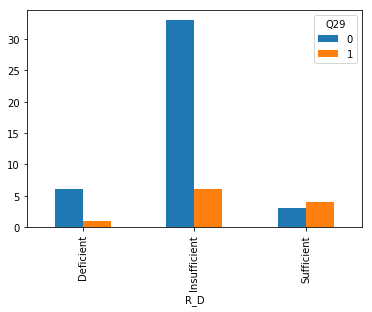

In [17]:
pivot2.plot(kind='bar')

In [18]:
Total_D = [pivot2.iloc[0, :] + pivot2.iloc[1, :] + pivot2.iloc[2, :]]
Total_D = pd.DataFrame(Total_D, index = ['Total D'])
piv = pivot2.append(Total_D)
Total_JFC = pivot2.iloc[:, 0] + pivot2.iloc[:, 1]
piv['Total JFC'] = Total_JFC
Percentage_Def = [(piv.iloc[0, :]/piv.iloc[3, :])*100]
Percentage_Insuff = [(piv.iloc[1, :]/piv.iloc[3, :])*100]
Percentage_Suff = [(piv.iloc[2, :]/piv.iloc[3, :])*100]
Percentage_Def = pd.DataFrame(Percentage_Def, index = ['Percentage Def'])
Percentage_Insuff = pd.DataFrame(Percentage_Insuff, index = ['Percentage Insuff'])
Percentage_Suff = pd.DataFrame(Percentage_Suff, index = ['Percentage Suff'])
Percentage_R0 = (piv.iloc[:, 0]/piv['Total JFC'])*100
Percentage_R1 = (piv.iloc[:, 1]/piv['Total JFC'])*100
piv = piv.append(Percentage_Def)
piv = piv.append(Percentage_Insuff)
piv = piv.append(Percentage_Suff)
piv['Percentage 0'] = Percentage_R0
piv['Percentage 1'] = Percentage_R1
piv

Q29,0,1,Total JFC,Percentage 0,Percentage 1
Deficient,6.000000,1.000000,7.0,85.714286,14.285714
Insufficient,33.000000,6.000000,39.0,84.615385,15.384615
Sufficient,3.000000,4.000000,7.0,42.857143,57.142857
Total D,42.000000,11.000000,NaN,NaN,NaN
Percentage Def,14.285714,9.090909,NaN,NaN,NaN
Percentage Insuff,78.571429,54.545455,NaN,NaN,NaN
Percentage Suff,7.142857,36.363636,NaN,NaN,NaN


### D vs Supplement Consumptions

In [19]:
pivot3 = pd.pivot_table(D, values='Count', index=['R_D'], columns=['Q30'], aggfunc=np.sum)
pivot3

Q30,0,1
R_D,,
Deficient,6,1
Insufficient,19,20
Sufficient,1,6


In [20]:
stat3 = stats.chi2_contingency(pivot3)
stat3

(7.152176408586665, 0.02798495584937314, 2, array([[ 3.43396226,  3.56603774],
        [19.13207547, 19.86792453],
        [ 3.43396226,  3.56603774]]))

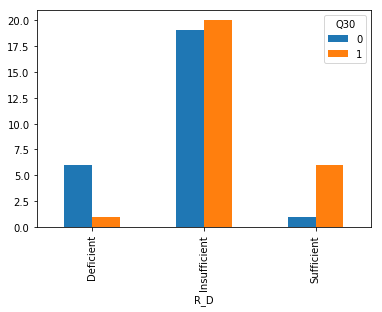

In [21]:
pivot3.plot(kind='bar')

In [22]:
Total_D = [pivot3.iloc[0, :] + pivot3.iloc[1, :] + pivot3.iloc[2, :]]
Total_D = pd.DataFrame(Total_D, index = ['Total D'])
piv = pivot3.append(Total_D)
Total_SC = pivot3.iloc[:, 0] + pivot3.iloc[:, 1]
piv['Total SC'] = Total_SC
Percentage_Def = [(piv.iloc[0, :]/piv.iloc[3, :])*100]
Percentage_Insuff = [(piv.iloc[1, :]/piv.iloc[3, :])*100]
Percentage_Suff = [(piv.iloc[2, :]/piv.iloc[3, :])*100]
Percentage_Def = pd.DataFrame(Percentage_Def, index = ['Percentage Def'])
Percentage_Insuff = pd.DataFrame(Percentage_Insuff, index = ['Percentage Insuff'])
Percentage_Suff = pd.DataFrame(Percentage_Suff, index = ['Percentage Suff'])
Percentage_R0 = (piv.iloc[:, 0]/piv['Total SC'])*100
Percentage_R1 = (piv.iloc[:, 1]/piv['Total SC'])*100
piv = piv.append(Percentage_Def)
piv = piv.append(Percentage_Insuff)
piv = piv.append(Percentage_Suff)
piv['Percentage 0'] = Percentage_R0
piv['Percentage 1'] = Percentage_R1
piv

Q30,0,1,Total SC,Percentage 0,Percentage 1
Deficient,6.000000,1.000000,7.0,85.714286,14.285714
Insufficient,19.000000,20.000000,39.0,48.717949,51.282051
Sufficient,1.000000,6.000000,7.0,14.285714,85.714286
Total D,26.000000,27.000000,NaN,NaN,NaN
Percentage Def,23.076923,3.703704,NaN,NaN,NaN
Percentage Insuff,73.076923,74.074074,NaN,NaN,NaN
Percentage Suff,3.846154,22.222222,NaN,NaN,NaN


### D vs Pain

In [23]:
pivot4 = pd.pivot_table(D, values='Count', index=['R_D'], columns=['Q31'], aggfunc=np.sum)
pivot4

Q31,0,1
R_D,,
Deficient,3,4
Insufficient,17,22
Sufficient,4,3


In [24]:
stat4 = stats.chi2_contingency(pivot4)
stat4

(0.4591280367142437, 0.7948800800921213, 2, array([[ 3.16981132,  3.83018868],
        [17.66037736, 21.33962264],
        [ 3.16981132,  3.83018868]]))

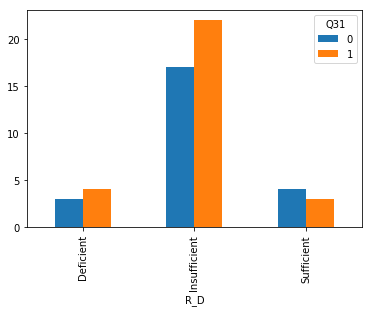

In [25]:
pivot4.plot(kind='bar')

In [26]:
Total_D = [pivot4.iloc[0, :] + pivot4.iloc[1, :] + pivot4.iloc[2, :]]
Total_D = pd.DataFrame(Total_D, index = ['Total D'])
piv = pivot4.append(Total_D)
Total_Pain = pivot4.iloc[:, 0] + pivot4.iloc[:, 1]
piv['Total Pain'] = Total_Pain
Percentage_Def = [(piv.iloc[0, :]/piv.iloc[3, :])*100]
Percentage_Insuff = [(piv.iloc[1, :]/piv.iloc[3, :])*100]
Percentage_Suff = [(piv.iloc[2, :]/piv.iloc[3, :])*100]
Percentage_Def = pd.DataFrame(Percentage_Def, index = ['Percentage Def'])
Percentage_Insuff = pd.DataFrame(Percentage_Insuff, index = ['Percentage Insuff'])
Percentage_Suff = pd.DataFrame(Percentage_Suff, index = ['Percentage Suff'])
Percentage_R0 = (piv.iloc[:, 0]/piv['Total Pain'])*100
Percentage_R1 = (piv.iloc[:, 1]/piv['Total Pain'])*100
piv = piv.append(Percentage_Def)
piv = piv.append(Percentage_Insuff)
piv = piv.append(Percentage_Suff)
piv['Percentage 0'] = Percentage_R0
piv['Percentage 1'] = Percentage_R1
piv

Q31,0,1,Total Pain,Percentage 0,Percentage 1
Deficient,3.000000,4.000000,7.0,42.857143,57.142857
Insufficient,17.000000,22.000000,39.0,43.589744,56.410256
Sufficient,4.000000,3.000000,7.0,57.142857,42.857143
Total D,24.000000,29.000000,NaN,NaN,NaN
Percentage Def,12.500000,13.793103,NaN,NaN,NaN
Percentage Insuff,70.833333,75.862069,NaN,NaN,NaN
Percentage Suff,16.666667,10.344828,NaN,NaN,NaN


### D vs RO Water Consumption

In [27]:
pivot5 = pd.pivot_table(D, values='Count', index=['R_D'], columns=['Q34'], aggfunc=np.sum)
pivot5

Q34,0,1
R_D,,
Deficient,1,6
Insufficient,16,23
Sufficient,2,5


In [28]:
stat5 = stats.chi2_contingency(pivot5)
stat5

(2.0309484117533647, 0.3622306172110369, 2, array([[ 2.50943396,  4.49056604],
        [13.98113208, 25.01886792],
        [ 2.50943396,  4.49056604]]))

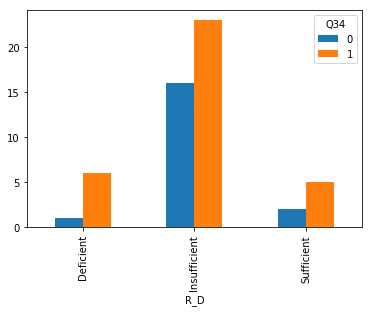

In [29]:
pivot5.plot(kind='bar')

In [30]:
Total_D = [pivot5.iloc[0, :] + pivot5.iloc[1, :] + pivot5.iloc[2, :]]
Total_D = pd.DataFrame(Total_D, index = ['Total D'])
piv = pivot5.append(Total_D)
Total_RO = pivot5.iloc[:, 0] + pivot5.iloc[:, 1]
piv['Total RO'] = Total_RO
Percentage_Def = [(piv.iloc[0, :]/piv.iloc[3, :])*100]
Percentage_Insuff = [(piv.iloc[1, :]/piv.iloc[3, :])*100]
Percentage_Suff = [(piv.iloc[2, :]/piv.iloc[3, :])*100]
Percentage_Def = pd.DataFrame(Percentage_Def, index = ['Percentage Def'])
Percentage_Insuff = pd.DataFrame(Percentage_Insuff, index = ['Percentage Insuff'])
Percentage_Suff = pd.DataFrame(Percentage_Suff, index = ['Percentage Suff'])
Percentage_R0 = (piv.iloc[:, 0]/piv['Total RO'])*100
Percentage_R1 = (piv.iloc[:, 1]/piv['Total RO'])*100
piv = piv.append(Percentage_Def)
piv = piv.append(Percentage_Insuff)
piv = piv.append(Percentage_Suff)
piv['Percentage 0'] = Percentage_R0
piv['Percentage 1'] = Percentage_R1
piv

Q34,0,1,Total RO,Percentage 0,Percentage 1
Deficient,1.000000,6.000000,7.0,14.285714,85.714286
Insufficient,16.000000,23.000000,39.0,41.025641,58.974359
Sufficient,2.000000,5.000000,7.0,28.571429,71.428571
Total D,19.000000,34.000000,NaN,NaN,NaN
Percentage Def,5.263158,17.647059,NaN,NaN,NaN
Percentage Insuff,84.210526,67.647059,NaN,NaN,NaN
Percentage Suff,10.526316,14.705882,NaN,NaN,NaN


### D vs BMD

In [31]:
pivot6 = pd.pivot_table(D, values='Count', index=['R_D'], columns=['R_BMD'], aggfunc=np.sum)
pivot6.fillna(0, inplace = True)
pivot6

R_BMD,Normal,Osteopenia,Osteoporotic
R_D,,,
Deficient,0.0,1.0,0.0
Insufficient,9.0,5.0,1.0
Sufficient,5.0,2.0,0.0


In [32]:
stat6 = stats.chi2_contingency(pivot6)
stat6

(2.581632653061224,
 0.6300802429037637,
 4,
 array([[0.60869565, 0.34782609, 0.04347826],
        [9.13043478, 5.2173913 , 0.65217391],
        [4.26086957, 2.43478261, 0.30434783]]))

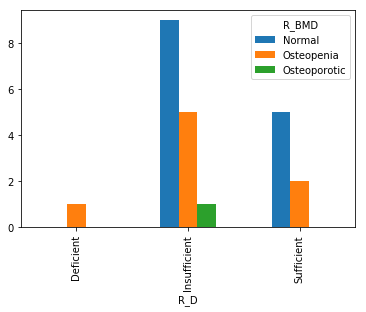

In [33]:
pivot6.plot(kind='bar')

In [34]:
Total_D = [pivot6.iloc[0, :] + pivot6.iloc[1, :] + pivot6.iloc[2, :]]
Total_D = pd.DataFrame(Total_D, index = ['Total D'])
piv = pivot6.append(Total_D)
Total_BMD = pivot6['Normal'] + pivot6['Osteopenia'] + pivot6['Osteoporotic']
piv['Total BMD'] = Total_BMD
Percentage_Def = [(piv.iloc[0, :]/piv.iloc[3, :])*100]
Percentage_Insuff = [(piv.iloc[1, :]/piv.iloc[3, :])*100]
Percentage_Suff = [(piv.iloc[2, :]/piv.iloc[3, :])*100]
Percentage_Def = pd.DataFrame(Percentage_Def, index = ['Percentage Def'])
Percentage_Insuff = pd.DataFrame(Percentage_Insuff, index = ['Percentage Insuff'])
Percentage_Suff = pd.DataFrame(Percentage_Suff, index = ['Percentage Suff'])
Percentage_R1 = (piv['Normal']/piv['Total BMD'])*100
Percentage_R2 = (piv['Osteopenia']/piv['Total BMD'])*100
Percentage_R3 = (piv['Osteoporotic']/piv['Total BMD'])*100
piv = piv.append(Percentage_Def)
piv = piv.append(Percentage_Insuff)
piv = piv.append(Percentage_Suff)
piv['Percentage Normal'] = Percentage_R1
piv['Percentage Osteopenia'] = Percentage_R2
piv['Percentage Osteoporotic'] = Percentage_R3
piv

R_BMD,Normal,Osteopenia,Osteoporotic,Total BMD,Percentage Normal,Percentage Osteopenia,Percentage Osteoporotic
Deficient,0.000000,1.0,0.0,1.0,0.000000,100.000000,0.000000
Insufficient,9.000000,5.0,1.0,15.0,60.000000,33.333333,6.666667
Sufficient,5.000000,2.0,0.0,7.0,71.428571,28.571429,0.000000
Total D,14.000000,8.0,1.0,NaN,NaN,NaN,NaN
Percentage Def,0.000000,12.5,0.0,NaN,NaN,NaN,NaN
Percentage Insuff,64.285714,62.5,100.0,NaN,NaN,NaN,NaN
Percentage Suff,35.714286,25.0,0.0,NaN,NaN,NaN,NaN
